In [ ]:

#1
import pandas as pd
import numpy as np



# Create a DataFrame with your data
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}



df = pd.DataFrame(data)



# Function to calculate entropy
def entropy(data):
    values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy



# Calculate the entropy for the 'buys_computer' class label
class_entropy = entropy(df['buys_computer'])



# Calculate Information Gain for each attribute/feature
features = df.columns[:-1]  # Exclude the 'buys_computer' column
information_gains = {}



for feature in features:
    weighted_entropy = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        subset_entropy = entropy(subset['buys_computer'])
        weight = len(subset) / len(df)
        weighted_entropy += weight * subset_entropy
    information_gain = class_entropy - weighted_entropy
    information_gains[feature] = information_gain



# Find the feature with the highest Information Gain
root_node = max(information_gains, key=information_gains.get)


print(df)
print("information :")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain}")



print(f"The first feature for constructing the decision tree (root node) is: {root_node}")

      age  income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2   31…40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes
5     >40     low     yes     excellent            no
6   31…40     low     yes     excellent           yes
7    <=30  medium      no          fair            no
8    <=30     low     yes          fair           yes
9     >40  medium     yes          fair           yes
10   <=30  medium     yes     excellent           yes
11  31…40  medium      no     excellent           yes
12  31…40    high     yes          fair           yes
13    >40  medium      no     excellent            no
information :
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
The first feature for constructing the decision tree (root 

In [2]:
# 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the data into a pandas DataFrame
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Convert categorical variables to numerical using one-hot encoding
enc = OneHotEncoder()
X = enc.fit_transform(df.iloc[:, :-1]).toarray()
y = df.iloc[:, -1]

# Split the data into training and testing sets
Tr_X, Ts_X, Tr_y, Ts_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier class
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Calculate the accuracy of the model on the training set
print(model.score(Tr_X, Tr_y))

# Get the depth of the constructed tree
print(model.get_depth())


1.0
4


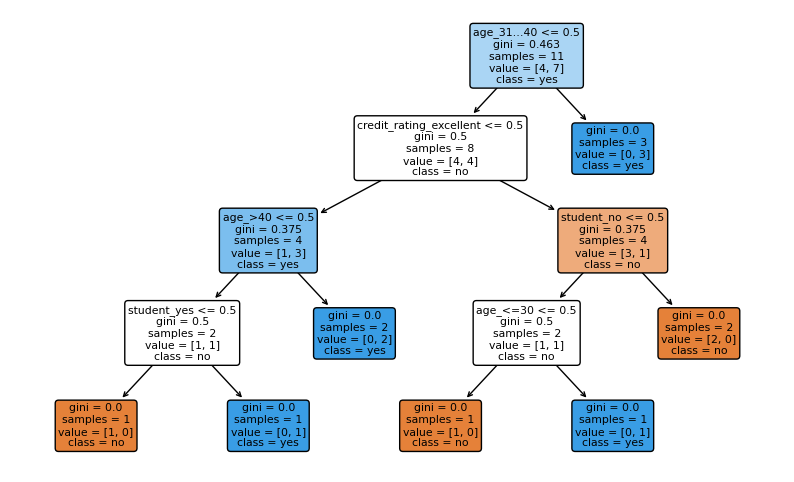

In [3]:
#2
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(model, feature_names=enc.get_feature_names_out(df.columns[:-1]), class_names=model.classes_, filled=True, rounded=True)
plt.show()


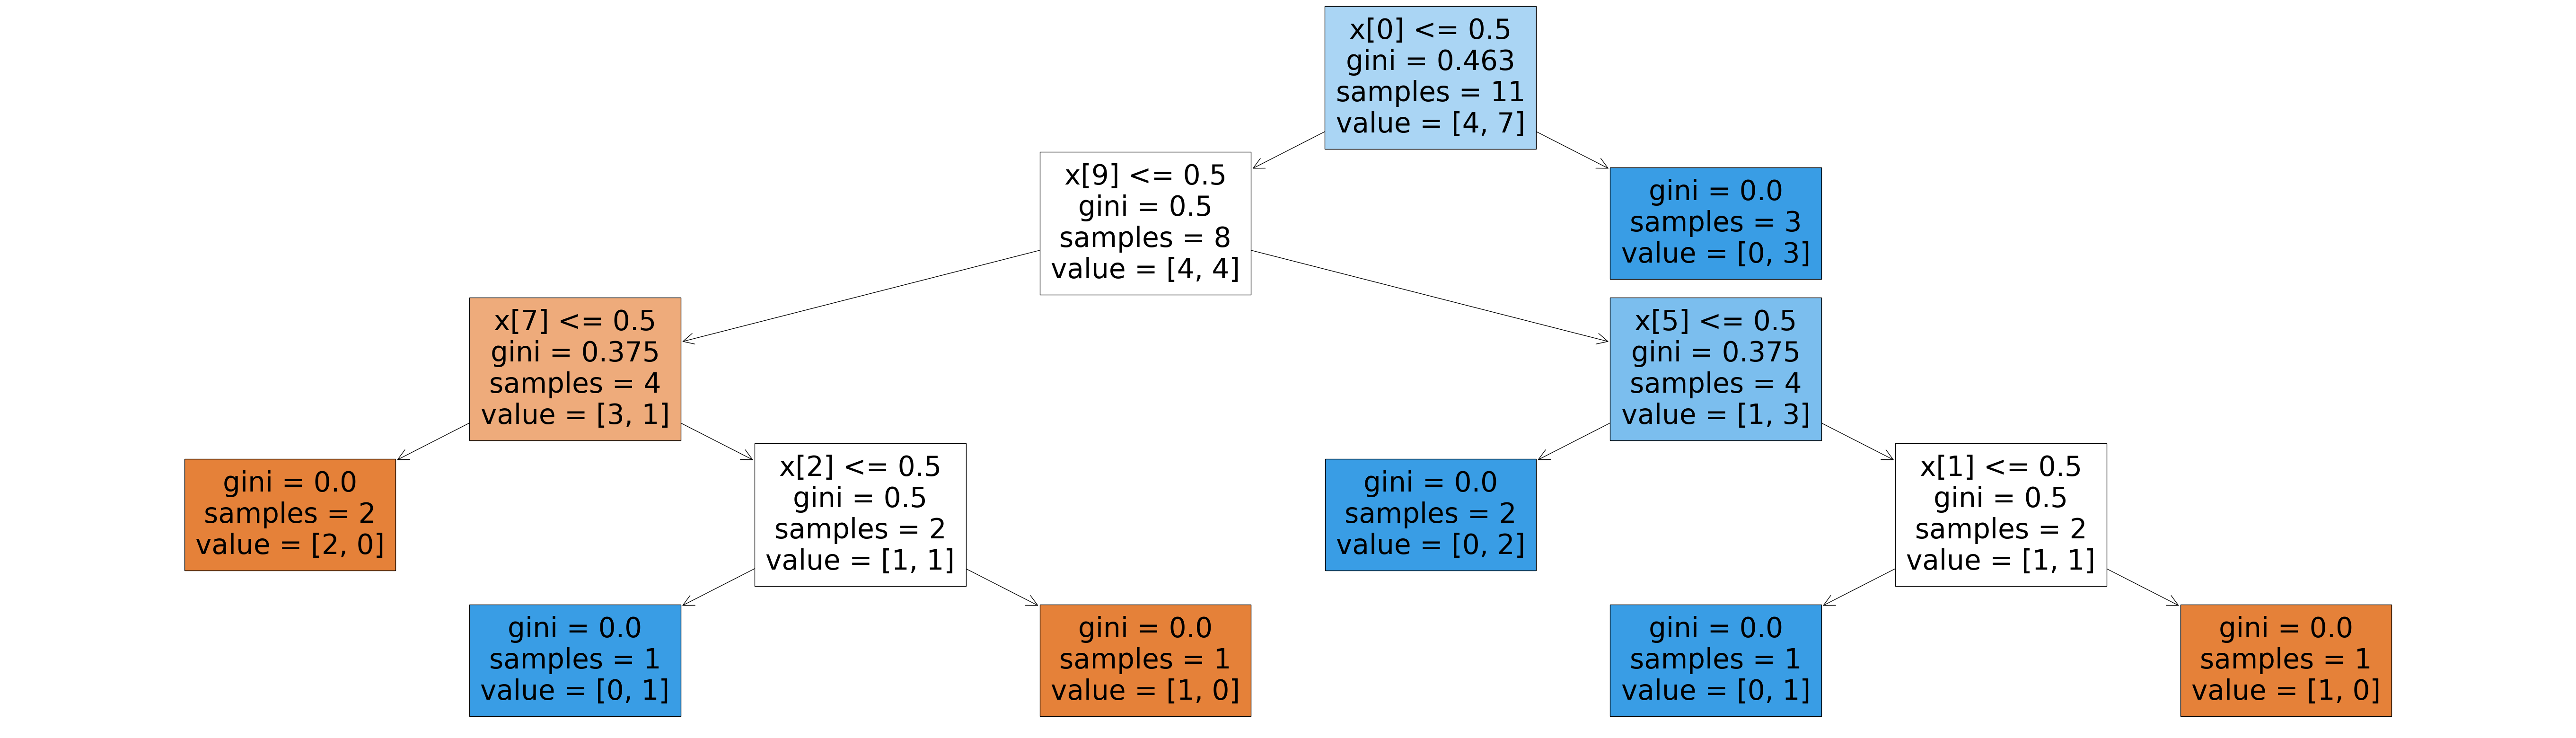

In [ ]:
#3
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the constructed tree with plot_tree() command
plt.figure(figsize=(70, 20))
tree.plot_tree(model, filled=True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# Load the data into a pandas DataFrame
df = pd.read_csv('your_project_data.csv')

# Convert categorical variables to numerical using label encoding
enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = enc.fit_transform(df[col])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier class
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Calculate the accuracy of the model on the training and test sets
print('Training set accuracy:', model.score(Tr_X, Tr_y))
print('Test set accuracy:', model.score(Te_X, Te_y))

# Visualize the constructed tree with plot_tree() command
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True)
plt.show()


FileNotFoundError: ignored